In [3]:
import pandas as pd
import numpy as np # Import numpy for nanmean

excel = pd.ExcelFile("kelp.xlsx")

# List of columns to keep
columns_to_keep = [
    'Bed Name', 'Site Code', 'Survey Date', 'Survey Day', 'Survey Month',
    'Survey Year', 'Acres', 'Temp', 'Temp 1 Shore Edge', 'Temp 1 Water Edge',
    'Temp 2 Shore Edge', 'Temp 2 Water Edge', 'Ave Shore Edge', 'Ave Temp Water Edge', 'NWSC Max Ext'
]

# List of temperature columns to average
temp_columns_to_average = [
    'Temp', 'Temp 1 Shore Edge', 'Temp 1 Water Edge', 'Temp 2 Shore Edge',
    'Temp 2 Water Edge', 'Ave Shore Edge', 'Ave Temp Water Edge'
]

# List of years to calculate average temperature for
years_to_average = ['2020','2021', '2022', '2023', '2024']

for sheet in excel.sheet_names:
    # Skip the 'Notes' sheet
    if sheet == 'Notes':
        print(f"Skipping sheet: {sheet}")
        continue

    print(f"Processing sheet: {sheet}") # Optional: To see which sheet is being processed
    df = pd.read_excel("kelp.xlsx", sheet_name=sheet)

    # Check which columns exist in the current sheet
    existing_columns = [col for col in columns_to_keep if col in df.columns]

    # If no desired columns exist, print a message and skip processing this sheet further
    if not existing_columns:
        print(f"Sheet '{sheet}' does not contain any of the desired columns. Skipping this sheet.")
        display(df.head()) # Display the head for context
        continue # Skip to the next sheet

    # Select only the existing columns
    df = df[existing_columns]

    # Calculate average temperature for specified years if temp columns exist
    if sheet in years_to_average:
        # Identify existing temperature columns to average in the current sheet
        existing_temp_columns = [col for col in temp_columns_to_average if col in df.columns]

        if existing_temp_columns:
            # Calculate the mean, ignoring NaN values
            df['Temp'] = df[existing_temp_columns].mean(axis=1, skipna=True)
            print(f"Calculated 'Average Temp' for sheet: {sheet}")
        else:
            print(f"No temperature columns found for averaging in sheet: {sheet}")
            df['Temp'] = np.nan # Add column with NaN if no temp columns exist


    # Drop rows where 'Acres' column is NaN, but only if the column exists and was selected
    if 'Acres' in df.columns:
        df = df.dropna(subset=['Acres'])
        print(f"Dropped rows with NaN in 'Acres' for sheet: {sheet}")
        display(df.head()) # Add this line to display the head of each DataFrame
    else:
        print(f"Sheet '{sheet}' does not have an 'Acres' column after selection. Skipping dropping NaN values for this sheet.")
        display(df.head()) # Display the head even if 'Acres' column is missing or not selected


    df.to_excel(f"{sheet}.xlsx", index=False)

Processing sheet: 2015
Dropped rows with NaN in 'Acres' for sheet: 2015


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Ebey's Landing,EBL,2015-06-14,14,6,2015,9.490754,11.0,NaN,0.0
1,Ebey's Landing,EBL,2015-07-19,19,7,2015,14.626063,13.0,NaN,0.0
2,Ebey's Landing,EBL,2015-08-15,15,8,2015,18.354044,13.0,NaN,1.0
3,Ebey's Landing,EBL,2015-09-26,26,9,2015,17.885642,12.0,NaN,0.0
4,Hastie Lake,HSTL,2015-06-15,15,6,2015,13.287837,NaN,NaN,NaN


Processing sheet: 2016
Dropped rows with NaN in 'Acres' for sheet: 2016


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Freshwater Bay 1,FWB,2016-07-30,30,7,2016,145.089653,12.0,NaN,0.0
1,Freshwater Bay 1,FWB,2016-08-19,19,8,2016,169.696118,14.0,NaN,1.0
2,Freshwater Bay 2,FWBO,2016-07-02,2,7,2016,0.706491,13.0,NaN,1.0
3,Ben Ure,BEUR,2016-07-01,1,7,2016,0.784476,12.0,NaN,NaN
4,Ben Ure,BEUR,2016-07-30,30,7,2016,0.820192,12.0,NaN,NaN


Processing sheet: 2017
Dropped rows with NaN in 'Acres' for sheet: 2017


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2017-07-09,9,7,2017,23.094739,13.0,NaN,0.0
1,Clallam Bay,CLLB,2017-07-23,23,7,2017,25.128053,12.0,NaN,1.0
2,Freshwater Bay 1,FWB,2017-08-20,20,8,2017,168.871267,NaN,NaN,1.0
3,Freshwater Bay 2,FWBO,2017-09-17,17,9,2017,0.929402,10.0,NaN,1.0
4,Ben Ure,BEUR,2017-05-25,25,5,2017,0.475675,9.0,NaN,NaN


Processing sheet: 2018
Dropped rows with NaN in 'Acres' for sheet: 2018


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN,1.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN,0.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN,1.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN,1.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN,NaN


Processing sheet: 2019
Dropped rows with NaN in 'Acres' for sheet: 2019


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2019-07-19,19,7,2019,22.331618,14.4,NaN,1
1,Freshwater Bay 1,FWB,2019-07-20,20,7,2019,117.860533,14.0,NaN,1
2,Freshwater Bay 2,FWBO,2019-07-18,18,7,2019,0.969558,15.0,NaN,1
3,Ebey's Landing,EBL,2019-06-21,21,6,2019,24.952333,12.0,NaN,0
4,Ebey's Landing,EBL,2019-07-18,18,7,2019,37.181197,12.3,NaN,0


Processing sheet: 2020
Calculated 'Average Temp' for sheet: 2020
Dropped rows with NaN in 'Acres' for sheet: 2020


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2020-07-23,23,7,2020,13.136316,12.0,12.0,1
1,Freshwater Bay 1,FWB,2020-08-19,19,8,2020,112.665764,12.2,12.2,1
2,Freshwater Bay 2,FWBO,2020-08-19,19,8,2020,0.635944,NaN,NaN,1
3,Lowell,LWLP,2020-08-22,22,8,2020,5.854933,13.9,13.9,1
4,Lowell,LWLP,2020-08-22,22,8,2020,4.915611,13.9,13.9,0


Processing sheet: 2021
Calculated 'Average Temp' for sheet: 2021
Dropped rows with NaN in 'Acres' for sheet: 2021


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2021-08-23,23,8,2021,15.315023,12.22,12.22,1.0
1,Freshwater Bay 1,FWB,2021-07-27,27,7,2021,128.509924,NaN,NaN,1.0
2,Freshwater Bay 2,FWBO,2021-09-07,7,9,2021,0.932312,11.11,11.11,1.0
3,Ebey's Landing,EBL,2021-08-11,11,8,2021,37.681341,12.00,12.00,1.0
4,Hoypus Point,HOYP,2021-06-07,7,6,2021,1.551245,11.00,11.00,0.0


Processing sheet: 2022
Calculated 'Average Temp' for sheet: 2022
Dropped rows with NaN in 'Acres' for sheet: 2022


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2022-08-29,29,8,2022,12.728182,12.22,12.22,1
1,Freshwater Bay 1,FWB,2022-07-31,31,7,2022,41.872913,13.33,13.33,1
2,Freshwater Bay 2,FWBO,2022-07-31,31,7,2022,0.782634,15.00,15.00,1
3,Freshwater Bay 3,FWBO-N,2022-07-31,31,7,2022,0.914538,NaN,NaN,1
4,Ebey's Landing,EBL,2022-08-23,23,8,2022,38.629817,12.25,12.25,1


Processing sheet: 2023
Calculated 'Average Temp' for sheet: 2023
Dropped rows with NaN in 'Acres' for sheet: 2023


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2023-09-02,2,9,2023,9.584521,NaN,NaN,0
1,Freshwater Bay 1,FWB,2023-08-14,14,8,2023,121.974427,11.4,11.4,1
2,Freshwater Bay 2,FWBO,2023-08-31,31,8,2023,0.586538,11.1,11.1,1
3,Freshwater Bay 3,FWBO-N,2023-08-31,31,8,2023,0.315308,11.1,11.1,1
4,Ebey's Landing,EBL,2023-08-14,14,8,2023,31.122627,12.2,12.2,1


Processing sheet: 2024
Calculated 'Average Temp' for sheet: 2024
Dropped rows with NaN in 'Acres' for sheet: 2024


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7,1
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7,1
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1,0
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0,0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1,1


Skipping sheet: Notes


In [4]:
import pandas as pd
import os

# Get a list of all processed Excel files (excluding the original and notes)
processed_files = [f for f in os.listdir('.') if f.endswith('.xlsx') and f not in ['kelp.xlsx', 'Notes.xlsx']]

# Create an empty list to store DataFrames
df_list = []

# Read each processed Excel file and append its DataFrame to the list
for file in processed_files:
    try:
        df = pd.read_excel(file)
        df_list.append(df)
        print(f"Successfully read {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames in the list
if df_list:
    merged_df = pd.concat(df_list, ignore_index=True)
    print("\nMerged DataFrame created:")
    display(merged_df.head())
    print("\nInfo of the merged DataFrame:")
    merged_df.info()

    # Drop the 'Ave Temp Water Edge' column after merging
    if 'Ave Temp Water Edge' in merged_df.columns:
        merged_df = merged_df.drop(columns=['Ave Temp Water Edge'])
        print("\n'Ave Temp Water Edge' column dropped from merged DataFrame.")
    else:
        print("\n'Ave Temp Water Edge' column not found in merged DataFrame.")


    # Sort the merged DataFrame by 'Survey Year'
    merged_df = merged_df.sort_values(by='Survey Year').reset_index(drop=True)
    print("\nMerged DataFrame sorted by year:")
    display(merged_df.head())

else:
    print("No processed Excel files found to merge.")

Successfully read 2019.xlsx
Successfully read 2016.xlsx
Successfully read 2023.xlsx
Successfully read 2017.xlsx
Successfully read 2022.xlsx
Successfully read 2015.xlsx
Successfully read 2021.xlsx
Successfully read 2020.xlsx
Successfully read 2024.xlsx
Successfully read 2018.xlsx

Merged DataFrame created:


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2019-07-19,19,7,2019,22.331618,14.4,NaN,1.0
1,Freshwater Bay 1,FWB,2019-07-20,20,7,2019,117.860533,14.0,NaN,1.0
2,Freshwater Bay 2,FWBO,2019-07-18,18,7,2019,0.969558,15.0,NaN,1.0
3,Ebey's Landing,EBL,2019-06-21,21,6,2019,24.952333,12.0,NaN,0.0
4,Ebey's Landing,EBL,2019-07-18,18,7,2019,37.181197,12.3,NaN,0.0



Info of the merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Bed Name             539 non-null    object        
 1   Site Code            539 non-null    object        
 2   Survey Date          539 non-null    datetime64[ns]
 3   Survey Day           539 non-null    int64         
 4   Survey Month         539 non-null    int64         
 5   Survey Year          539 non-null    int64         
 6   Acres                539 non-null    float64       
 7   Temp                 463 non-null    float64       
 8   Ave Temp Water Edge  208 non-null    float64       
 9   NWSC Max Ext         497 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 42.2+ KB

'Ave Temp Water Edge' column dropped from merged DataFrame.

Merged DataFrame sorted by year:


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,NWSC Max Ext
0,Hastie Lake,HSTL,2015-07-27,27,7,2015,12.260097,13.80,NaN
1,Hastie Lake,HSTL,2015-08-23,23,8,2015,14.545735,NaN,NaN
2,Pole Pass,POLP,2015-08-26,26,8,2015,0.386057,10.56,0.0
3,Edmond 2 (B),ED-N,2015-07-14,14,7,2015,15.140039,15.00,1.0
4,Edmond 3 (A),ED-N,2015-07-14,14,7,2015,0.931591,15.00,1.0


In [5]:
for sheet in excel.sheet_names:
    # Select only the existing columns
    df = df[existing_columns]

    # Drop rows where 'Acres' column is NaN, but only if the column exists and was selected
    if 'Temp' in df.columns:
        df = df.dropna(subset=['Temp'])
        print(f"Dropped rows with NAN in 'Temp' for sheet: {sheet}")
        display(df.head()) # Add this line to display the head of each DataFrame

Dropped rows with NAN in 'Temp' for sheet: 2015


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN,1.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN,0.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN,1.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN,1.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN,NaN


Dropped rows with NAN in 'Temp' for sheet: 2016


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN,1.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN,0.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN,1.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN,1.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN,NaN


Dropped rows with NAN in 'Temp' for sheet: 2017


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN,1.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN,0.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN,1.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN,1.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN,NaN


Dropped rows with NAN in 'Temp' for sheet: 2018


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN,1.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN,0.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN,1.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN,1.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN,NaN


Dropped rows with NAN in 'Temp' for sheet: 2019


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN,1.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN,0.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN,1.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN,1.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN,NaN


Dropped rows with NAN in 'Temp' for sheet: 2020


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN,1.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN,0.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN,1.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN,1.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN,NaN


Dropped rows with NAN in 'Temp' for sheet: 2021


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN,1.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN,0.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN,1.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN,1.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN,NaN


Dropped rows with NAN in 'Temp' for sheet: 2022


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN,1.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN,0.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN,1.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN,1.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN,NaN


Dropped rows with NAN in 'Temp' for sheet: 2023


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN,1.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN,0.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN,1.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN,1.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN,NaN


Dropped rows with NAN in 'Temp' for sheet: 2024


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN,1.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN,0.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN,1.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN,1.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN,NaN


Dropped rows with NAN in 'Temp' for sheet: Notes


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge,NWSC Max Ext
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN,1.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN,0.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN,1.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN,1.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN,NaN


In [6]:
df.drop(columns=['Ave Temp Water Edge'])

,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,NWSC Max Ext
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,1.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,0.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,1.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,1.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN
5,Ben Ure,BEUR,2018-07-12,12,7,2018,1.187593,12.0,NaN
6,Ben Ure,BEUR,2018-07-13,13,7,2018,1.216470,12.0,NaN
7,Ben Ure,BEUR,2018-08-24,24,8,2018,0.998649,12.0,NaN
8,Ebey's Landing,EBL,2018-05-28,28,5,2018,0.301316,10.0,0.0
9,Ebey's Landing,EBL,2018-07-02,2,7,2018,18.513422,12.0,0.0


In [7]:
# Drop NAN values for temp after merging
if 'Temp' in merged_df.columns:
    merged_df = merged_df.dropna(subset=['Temp'])

In [8]:
merged_df.tail()

,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,NWSC Max Ext
534,Freshwater Bay 3,FWBO-N,2024-09-01,1,9,2024,4.794317,13.9,1.0
535,Hat Island,HAT-S,2024-07-08,8,7,2024,30.614592,18.9,0.0
536,Hat Island,HAT-S,2024-08-05,5,8,2024,46.115030,16.0,0.0
537,Hat Island,HAT-S,2024-09-16,16,9,2024,60.451229,14.0,1.0
538,Hat Island West,HAT-W,2024-08-05,5,8,2024,9.266043,15.6,0.0


In [9]:
# Save the merged DataFrame to a CSV file
output_csv_path = "merged_kelp_data.csv" # You can change the filename if you like
merged_df.to_csv(output_csv_path, index=False)

print(f"Merged DataFrame saved to '{output_csv_path}'")

Merged DataFrame saved to 'merged_kelp_data.csv'


In [10]:
merged_df = pd.read_csv("merged_kelp_data.csv")

##Correlation Matrices

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

##All beds

Prepared 'Coffin Rocks' data for imputation.
Monthly average temperatures for All beds (NWSC Max Ext == 1) calculated for imputation:


,Temp
Survey Month,
7,14.364898
8,13.919700
9,12.630000


Missing lagged temperature values imputed.


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,NWSC Max Ext,Previous Year Temp,Two Years Ago Temp
155,Aiston Preserve,AISP,2018-07-31,31,7,2018,0.117903,16.00,1.0,14.364898,14.364898
234,Aiston Preserve,AISP,2019-08-01,1,8,2019,0.167167,16.00,1.0,16.000000,13.919700
271,Aiston Preserve,AISP,2020-07-20,20,7,2020,0.327542,15.00,1.0,16.000000,16.000000
314,Aiston Preserve,AISP,2021-07-27,27,7,2021,0.207529,14.44,1.0,15.000000,16.000000
338,Aiston Preserve,AISP,2022-07-31,31,7,2022,0.296172,20.00,1.0,14.440000,15.000000


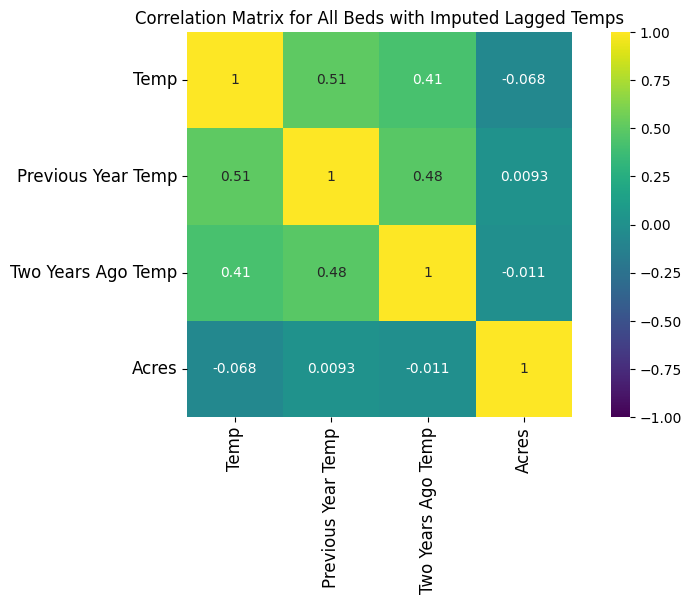

Number of rows assessed for correlation in All beds: 181


In [38]:
merged_df_nwsc = merged_df[(merged_df['NWSC Max Ext'] == 1)].copy()

# Ensure 'Survey Date' is in datetime format
merged_df_nwsc['Survey Date'] = pd.to_datetime(merged_df_nwsc['Survey Date'])

# Sort by Site Code and Survey Date to ensure correct lagging
merged_df_nwsc = merged_df_nwsc.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
merged_df_nwsc = merged_df_nwsc.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
merged_df_nwsc['Previous Year Temp'] = merged_df_nwsc.groupby(['Site Code'])['Temp'].shift(1)

# Calculate Two Years Ago Temp by grouping and shifting
merged_df_nwsc['Two Years Ago Temp'] = merged_df_nwsc.groupby(['Site Code'])['Temp'].shift(2)

print("Prepared 'Coffin Rocks' data for imputation.")

monthly_avg_nwsc = merged_df_nwsc.groupby('Survey Month')['Temp'].mean()
print("Monthly average temperatures for All beds (NWSC Max Ext == 1) calculated for imputation:")
display(monthly_avg_nwsc)

for index, row in merged_df_nwsc.iterrows():
    month = row['Survey Month']

    if pd.isna(row['Previous Year Temp']):
        merged_df_nwsc.loc[index, 'Previous Year Temp'] = monthly_avg_nwsc.get(month, row['Temp']) # Use current Temp if monthly average not found

    if pd.isna(row['Two Years Ago Temp']):
       merged_df_nwsc.loc[index, 'Two Years Ago Temp'] = monthly_avg_nwsc.get(month, row['Temp']) # Use current Temp if monthly average not found

print("Missing lagged temperature values imputed.")
display(merged_df_nwsc.head())

predictor_variables_imputed_nwsc = ['Temp', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_imputed_nwsc = merged_df_nwsc[predictor_variables_imputed_nwsc].select_dtypes(include='number').columns.to_list()

# Ensure 'Acres' is also included for correlation
if 'Acres' not in numerical_predictors_imputed_nwsc:
    numerical_predictors_imputed_nwsc.append('Acres')

corr_matrix_imputed_nwsc = merged_df_nwsc[numerical_predictors_imputed_nwsc].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix_imputed_nwsc, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)
plt.tick_params(labelsize=12)
plt.title('Correlation Matrix for All Beds with Imputed Lagged Temps')
plt.show()

print(f"Number of rows assessed for correlation in All beds: {len(merged_df_nwsc)}")

202 rows assessed before cleaning

July

Filtered July data and calculated lagged temperature variables.
Imputing missing lagged temperature values in July data...
Missing lagged temperature values in July data imputed.


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,NWSC Max Ext,Previous Year Temp,Two Years Ago Temp
155,Aiston Preserve,AISP,2018-07-31,31,7,2018,0.117903,16.00,1.0,14.364898,14.364898
271,Aiston Preserve,AISP,2020-07-20,20,7,2020,0.327542,15.00,1.0,16.000000,14.364898
314,Aiston Preserve,AISP,2021-07-27,27,7,2021,0.207529,14.44,1.0,15.000000,16.000000
338,Aiston Preserve,AISP,2022-07-31,31,7,2022,0.296172,20.00,1.0,14.440000,15.000000
404,Aiston Preserve,AISP,2023-07-20,20,7,2023,0.275998,12.20,1.0,20.000000,14.440000


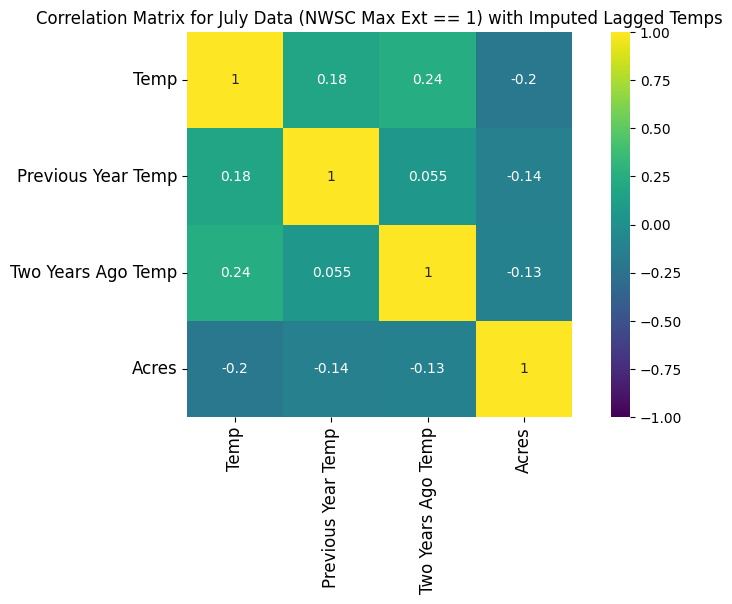

Number of rows assessed for correlation in July data: 49


In [40]:
july_data_nwsc = merged_df[(merged_df['NWSC Max Ext'] == 1) & (merged_df['Survey Month'] == 7)].copy()

# Ensure 'Survey Date' is in datetime format
july_data_nwsc['Survey Date'] = pd.to_datetime(july_data_nwsc['Survey Date'])

# Sort by Site Code and Survey Date to ensure correct lagging
july_data_nwsc = july_data_nwsc.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
july_data_nwsc = july_data_nwsc.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
july_data_nwsc['Previous Year Temp'] = july_data_nwsc.groupby(['Site Code'])['Temp'].shift(1)

# Calculate Two Years Ago Temp by grouping and shifting
july_data_nwsc['Two Years Ago Temp'] = july_data_nwsc.groupby(['Site Code'])['Temp'].shift(2)

print("Filtered July data and calculated lagged temperature variables.")

# Calculate overall monthly average temperatures for all beds (NWSC Max Ext == 1)
# This was previously calculated as monthly_avg_nwsc_overall
monthly_avg_nwsc_overall = merged_df_nwsc.groupby('Survey Month')['Temp'].mean()

print("Imputing missing lagged temperature values in July data...")
for index, row in july_data_nwsc.iterrows():
    month = row['Survey Month']

    if pd.isna(row['Previous Year Temp']):
        july_data_nwsc.loc[index, 'Previous Year Temp'] = monthly_avg_nwsc_overall.get(month, row['Temp']) # Use current Temp if monthly average not found

    if pd.isna(row['Two Years Ago Temp']):
       july_data_nwsc.loc[index, 'Two Years Ago Temp'] = monthly_avg_nwsc_overall.get(month, row['Temp']) # Use current Temp if monthly average not found

print("Missing lagged temperature values in July data imputed.")
display(july_data_nwsc.head())

predictor_variables_imputed_july = ['Temp', 'Previous Year Temp', 'Two Years Ago Temp', 'Acres']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_imputed_july = july_data_nwsc[predictor_variables_imputed_july].select_dtypes(include='number').columns.to_list()

corr_matrix_imputed_july = july_data_nwsc[numerical_predictors_imputed_july].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix_imputed_july, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)
plt.tick_params(labelsize=12)
plt.title('Correlation Matrix for July Data (NWSC Max Ext == 1) with Imputed Lagged Temps')
plt.show()

print(f"Number of rows assessed for correlation in July data: {len(july_data_nwsc)}")

61 rows before cleaning

August

Filtered August data and calculated lagged temperature variables.
Imputing missing lagged temperature values in August data...
Missing lagged temperature values in August data imputed.


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,NWSC Max Ext,Previous Year Temp,Two Years Ago Temp
234,Aiston Preserve,AISP,2019-08-01,1,8,2019,0.167167,16.0,1.0,13.9197,13.9197
154,Alden Bank,ALDB,2018-08-13,13,8,2018,17.558890,11.0,1.0,13.9197,13.9197
233,Alden Bank,ALDB,2019-08-12,12,8,2019,30.529914,13.0,1.0,11.0000,13.9197
198,Biz Point,BZPT,2018-08-13,13,8,2018,0.651077,12.0,1.0,13.9197,13.9197
221,Biz Point,BZPT,2019-08-26,26,8,2019,0.710716,12.0,1.0,12.0000,13.9197


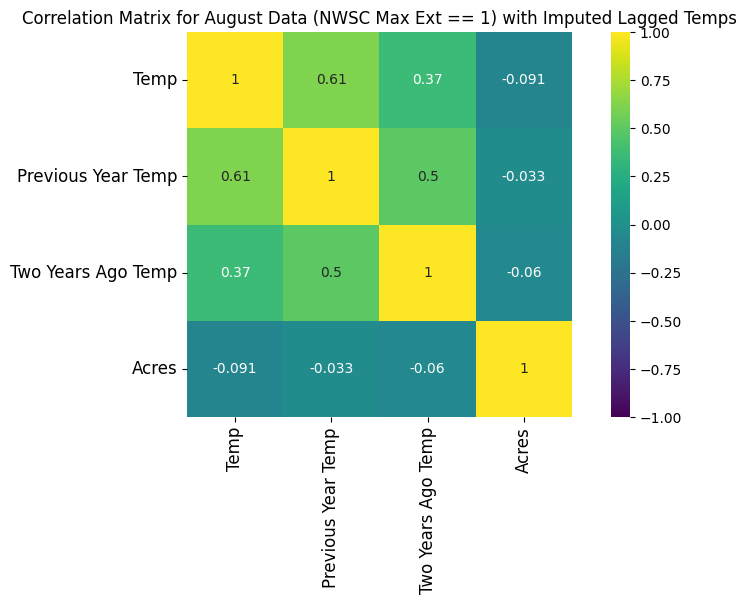

Number of rows assessed for correlation in August data: 100


In [42]:
august_data_nwsc = merged_df[(merged_df['NWSC Max Ext'] == 1) & (merged_df['Survey Month'] == 8)].copy()

# Ensure 'Survey Date' is in datetime format
august_data_nwsc['Survey Date'] = pd.to_datetime(august_data_nwsc['Survey Date'])

# Sort by Site Code and Survey Date to ensure correct lagging
august_data_nwsc = august_data_nwsc.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
august_data_nwsc = august_data_nwsc.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
august_data_nwsc['Previous Year Temp'] = august_data_nwsc.groupby(['Site Code'])['Temp'].shift(1)

# Calculate Two Years Ago Temp by grouping and shifting
august_data_nwsc['Two Years Ago Temp'] = august_data_nwsc.groupby(['Site Code'])['Temp'].shift(2)

print("Filtered August data and calculated lagged temperature variables.")

# Calculate overall monthly average temperatures for all beds (NWSC Max Ext == 1)
# This was previously calculated as monthly_avg_nwsc_overall
# If monthly_avg_nwsc_overall is not defined yet (e.g. if this cell is run standalone),
# it should be re-calculated from merged_df_nwsc
if 'monthly_avg_nwsc_overall' not in locals() or monthly_avg_nwsc_overall.empty:
    monthly_avg_nwsc_overall = merged_df_nwsc.groupby('Survey Month')['Temp'].mean()

print("Imputing missing lagged temperature values in August data...")
for index, row in august_data_nwsc.iterrows():
    month = row['Survey Month']

    if pd.isna(row['Previous Year Temp']):
        august_data_nwsc.loc[index, 'Previous Year Temp'] = monthly_avg_nwsc_overall.get(month, row['Temp']) # Use current Temp if monthly average not found

    if pd.isna(row['Two Years Ago Temp']):
       august_data_nwsc.loc[index, 'Two Years Ago Temp'] = monthly_avg_nwsc_overall.get(month, row['Temp']) # Use current Temp if monthly average not found

print("Missing lagged temperature values in August data imputed.")
display(august_data_nwsc.head())

predictor_variables_imputed_august = ['Temp', 'Previous Year Temp', 'Two Years Ago Temp', 'Acres']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_imputed_august = august_data_nwsc[predictor_variables_imputed_august].select_dtypes(include='number').columns.to_list()

corr_matrix_imputed_august = august_data_nwsc[numerical_predictors_imputed_august].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix_imputed_august, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)
plt.tick_params(labelsize=12)
plt.title('Correlation Matrix for August Data (NWSC Max Ext == 1) with Imputed Lagged Temps')
plt.show()

print(f"Number of rows assessed for correlation in August data: {len(august_data_nwsc)}")

109 rows before cleaning

September

Filtered September data and calculated lagged temperature variables.
Imputing missing lagged temperature values in September data...
Missing lagged temperature values in September data imputed.


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,NWSC Max Ext,Previous Year Temp,Two Years Ago Temp
354,Biz Point,BZPT,2022-09-08,8,9,2022,0.985684,11.67,1.0,12.63,12.63
416,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.10,1.0,11.67,12.63
413,Biz Point South,BZPT-S,2024-09-16,16,9,2024,1.790402,11.10,1.0,12.63,12.63
294,Cherry Point-Gulf Rd,CHPT,2020-09-01,1,9,2020,33.130759,13.30,1.0,12.63,12.63
417,Cherry Point-Gulf Rd,CHPT,2024-09-01,1,9,2024,24.558852,13.90,1.0,13.30,12.63


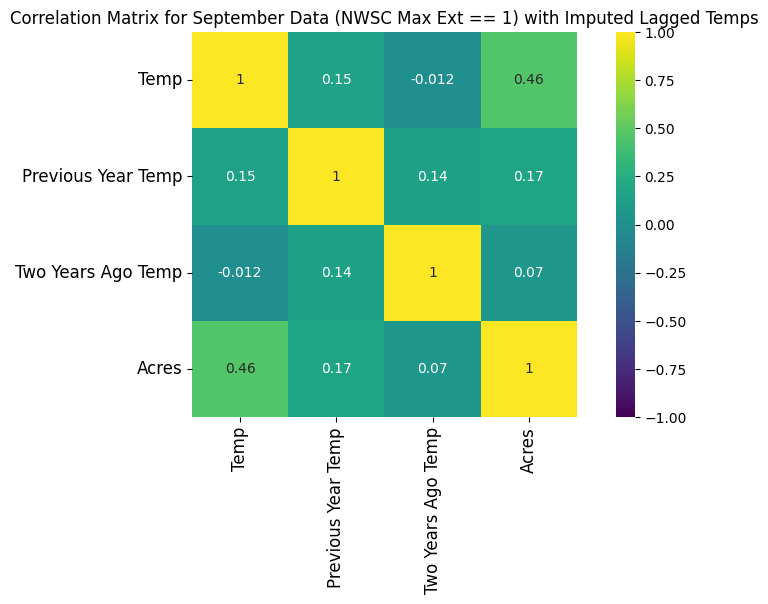

Number of rows assessed for correlation in September data: 32


In [45]:
september_data_nwsc = merged_df[(merged_df['NWSC Max Ext'] == 1) & (merged_df['Survey Month'] == 9)].copy()

# Ensure 'Survey Date' is in datetime format
september_data_nwsc['Survey Date'] = pd.to_datetime(september_data_nwsc['Survey Date'])

# Sort by Site Code and Survey Date to ensure correct lagging
september_data_nwsc = september_data_nwsc.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
september_data_nwsc = september_data_nwsc.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
september_data_nwsc['Previous Year Temp'] = september_data_nwsc.groupby(['Site Code'])['Temp'].shift(1)

# Calculate Two Years Ago Temp by grouping and shifting
september_data_nwsc['Two Years Ago Temp'] = september_data_nwsc.groupby(['Site Code'])['Temp'].shift(2)

print("Filtered September data and calculated lagged temperature variables.")

# Calculate overall monthly average temperatures for all beds (NWSC Max Ext == 1)
# This was previously calculated as monthly_avg_nwsc_overall
# If monthly_avg_nwsc_overall is not defined yet (e.g. if this cell is run standalone),
# it should be re-calculated from merged_df_nwsc
if 'monthly_avg_nwsc_overall' not in locals() or monthly_avg_nwsc_overall.empty:
    monthly_avg_nwsc_overall = merged_df_nwsc.groupby('Survey Month')['Temp'].mean()

print("Imputing missing lagged temperature values in September data...")
for index, row in september_data_nwsc.iterrows():
    month = row['Survey Month']

    if pd.isna(row['Previous Year Temp']):
        september_data_nwsc.loc[index, 'Previous Year Temp'] = monthly_avg_nwsc_overall.get(month, row['Temp']) # Use current Temp if monthly average not found

    if pd.isna(row['Two Years Ago Temp']):
       september_data_nwsc.loc[index, 'Two Years Ago Temp'] = monthly_avg_nwsc_overall.get(month, row['Temp']) # Use current Temp if monthly average not found

print("Missing lagged temperature values in September data imputed.")
display(september_data_nwsc.head())

predictor_variables_imputed_september = ['Temp', 'Previous Year Temp', 'Two Years Ago Temp', 'Acres']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_imputed_september = september_data_nwsc[predictor_variables_imputed_september].select_dtypes(include='number').columns.to_list()

corr_matrix_imputed_september = september_data_nwsc[numerical_predictors_imputed_september].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix_imputed_september, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)
plt.tick_params(labelsize=12)
plt.title('Correlation Matrix for September Data (NWSC Max Ext == 1) with Imputed Lagged Temps')
plt.show()

print(f"Number of rows assessed for correlation in September data: {len(september_data_nwsc)}")

32 rows before cleaning

##Coffin Rocks

Prepared 'Coffin Rocks' data for imputation.
Monthly average temperatures for 'Coffin Rocks' beds (NWSC Max Ext == 1) calculated for imputation:


,Temp
Survey Month,
8,12.361667
9,11.566667


Missing lagged temperature values imputed.


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,NWSC Max Ext,Previous Year Temp,Two Years Ago Temp
62,Coffin Rocks,COFF,2016-09-26,26,9,2016,1.282635,11.0,1.0,11.566667,11.566667
114,Coffin Rocks,COFF,2017-08-06,6,8,2017,1.281513,12.0,1.0,11.000000,12.361667
191,Coffin Rocks,COFF,2018-08-10,10,8,2018,1.326819,13.0,1.0,12.000000,11.000000
209,Coffin Rocks,COFF,2019-09-25,25,9,2019,1.335530,12.0,1.0,13.000000,12.000000
260,Coffin Rocks,COFF,2020-08-17,17,8,2020,1.403082,13.0,1.0,12.000000,13.000000


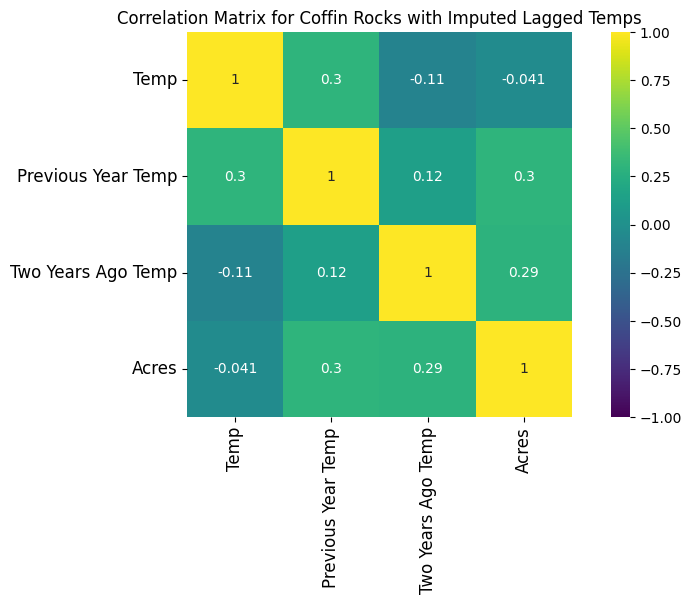

Number of rows assessed for correlation in Coffin Rocks: 9


In [12]:
coff_rocks_imputation_df = merged_df[(merged_df['Bed Name'] == 'Coffin Rocks') & (merged_df['NWSC Max Ext'] == 1)].copy()

# Ensure 'Survey Date' is in datetime format
coff_rocks_imputation_df['Survey Date'] = pd.to_datetime(coff_rocks_imputation_df['Survey Date'])

# Sort by Site Code and Survey Date to ensure correct lagging
coff_rocks_imputation_df = coff_rocks_imputation_df.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
coff_rocks_imputation_df = coff_rocks_imputation_df.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
coff_rocks_imputation_df['Previous Year Temp'] = coff_rocks_imputation_df.groupby(['Site Code'])['Temp'].shift(1)

# Calculate Two Years Ago Temp by grouping and shifting
coff_rocks_imputation_df['Two Years Ago Temp'] = coff_rocks_imputation_df.groupby(['Site Code'])['Temp'].shift(2)

print("Prepared 'Coffin Rocks' data for imputation.")

monthly_avg_temps_coff_rocks = coff_rocks_imputation_df.groupby('Survey Month')['Temp'].mean()
print("Monthly average temperatures for 'Coffin Rocks' beds (NWSC Max Ext == 1) calculated for imputation:")
display(monthly_avg_temps_coff_rocks)

for index, row in coff_rocks_imputation_df.iterrows():
    month = row['Survey Month']

    if pd.isna(row['Previous Year Temp']):
        coff_rocks_imputation_df.loc[index, 'Previous Year Temp'] = monthly_avg_temps_coff_rocks.get(month, row['Temp']) # Use current Temp if monthly average not found

    if pd.isna(row['Two Years Ago Temp']):
        coff_rocks_imputation_df.loc[index, 'Two Years Ago Temp'] = monthly_avg_temps_coff_rocks.get(month, row['Temp']) # Use current Temp if monthly average not found

print("Missing lagged temperature values imputed.")
display(coff_rocks_imputation_df.head())

predictor_variables_imputed = ['Temp', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_imputed = coff_rocks_imputation_df[predictor_variables_imputed].select_dtypes(include='number').columns.to_list()

# Ensure 'Acres' is also included for correlation
if 'Acres' not in numerical_predictors_imputed:
    numerical_predictors_imputed.append('Acres')

corr_matrix_imputed = coff_rocks_imputation_df[numerical_predictors_imputed].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix_imputed, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)
plt.tick_params(labelsize=12)
plt.title('Correlation Matrix for Coffin Rocks with Imputed Lagged Temps')
plt.show()

print(f"Number of rows assessed for correlation in Coffin Rocks: {len(coff_rocks_imputation_df)}")

Lowell

Year-month average temperatures for Lowell beds (NWSC Max Ext == 1) calculated:


,,Temp
Survey Year,Survey Month,
2016,9,14.0
2020,8,13.9
2021,9,12.7
2022,8,17.8
2023,8,19.6
2024,9,13.7


Beginning imputation for missing lagged temperature values...
Missing lagged temperature values imputed.


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,NWSC Max Ext,Previous Year Temp,Two Years Ago Temp
31,Lowell,LWLP,2016-09-16,16,9,2016,18.081365,14.0,1.0,14.0,14.0
250,Lowell,LWLP,2020-08-22,22,8,2020,5.854933,13.9,1.0,14.0,13.9
297,Lowell,LWLP,2021-09-19,19,9,2021,22.811846,12.7,1.0,13.9,14.0
360,Lowell,LWLP,2022-08-12,12,8,2022,10.884915,17.8,1.0,12.7,13.9
394,Lowell,LWLP,2023-08-15,15,8,2023,19.738947,19.6,1.0,17.8,12.7


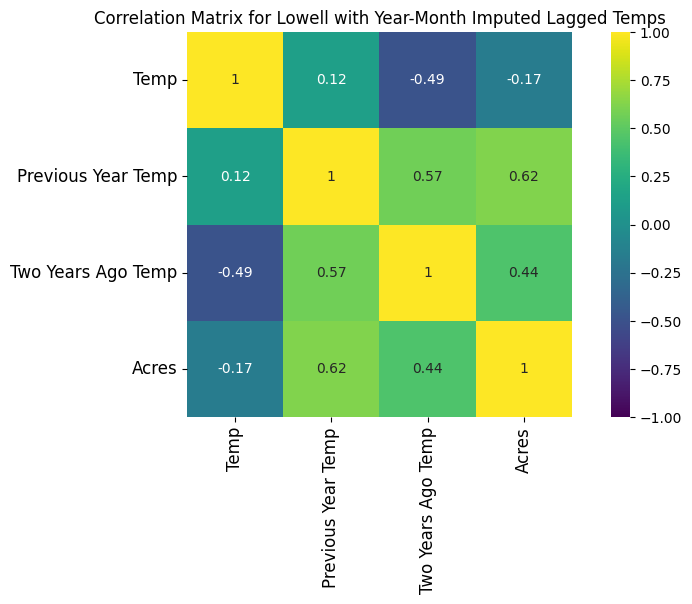

Number of rows assessed for correlation in Lowell: 6


In [13]:
lowell_imputation_df = merged_df[(merged_df['Bed Name'] == 'Lowell') & (merged_df['NWSC Max Ext'] == 1)].copy()

# Ensure 'Survey Date' is in datetime format
lowell_imputation_df['Survey Date'] = pd.to_datetime(lowell_imputation_df['Survey Date'])

# Sort by Site Code and Survey Date to ensure correct lagging
lowell_imputation_df = lowell_imputation_df.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
lowell_imputation_df = lowell_imputation_df.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate the average 'Temp' for each unique combination of 'Survey Year' and 'Survey Month'
year_month_avg_temps_lowell = lowell_imputation_df.groupby(['Survey Year', 'Survey Month'])['Temp'].mean()
print("Year-month average temperatures for Lowell beds (NWSC Max Ext == 1) calculated:")
display(year_month_avg_temps_lowell)

lowell_imputation_df['Previous Year Temp'] = lowell_imputation_df.groupby(['Site Code'])['Temp'].shift(1)
lowell_imputation_df['Two Years Ago Temp'] = lowell_imputation_df.groupby(['Site Code'])['Temp'].shift(2)

print("Beginning imputation for missing lagged temperature values...")

for index, row in lowell_imputation_df.iterrows():
    current_year = row['Survey Year']
    current_month = row['Survey Month']

    # Impute 'Previous Year Temp'
    if pd.isna(row['Previous Year Temp']):
        prev_year = current_year - 1
        # Try to get year-month specific average
        prev_year_month_avg = year_month_avg_temps_lowell.get((prev_year, current_month))
        if pd.isna(prev_year_month_avg):
            # Fallback to current year's observed Temp if no specific average is available
            lowell_imputation_df.loc[index, 'Previous Year Temp'] = row['Temp']
        else:
            lowell_imputation_df.loc[index, 'Previous Year Temp'] = prev_year_month_avg

    # Impute 'Two Years Ago Temp'
    if pd.isna(row['Two Years Ago Temp']):
        two_years_ago = current_year - 2
        # Try to get year-month specific average
        two_years_ago_month_avg = year_month_avg_temps_lowell.get((two_years_ago, current_month))
        if pd.isna(two_years_ago_month_avg):
            # Fallback to current year's observed Temp if no specific average is available
            lowell_imputation_df.loc[index, 'Two Years Ago Temp'] = row['Temp']
        else:
            lowell_imputation_df.loc[index, 'Two Years Ago Temp'] = two_years_ago_month_avg

print("Missing lagged temperature values imputed.")
display(lowell_imputation_df.head())

predictor_variables_imputed_lowell = ['Temp', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_imputed_lowell = lowell_imputation_df[predictor_variables_imputed_lowell].select_dtypes(include='number').columns.to_list()

# Ensure 'Acres' is also included for correlation
if 'Acres' not in numerical_predictors_imputed_lowell:
    numerical_predictors_imputed_lowell.append('Acres')

corr_matrix_imputed_lowell = lowell_imputation_df[numerical_predictors_imputed_lowell].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix_imputed_lowell, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)
plt.tick_params(labelsize=12)
plt.title('Correlation Matrix for Lowell with Year-Month Imputed Lagged Temps')
plt.show()

print(f"Number of rows assessed for correlation in Lowell: {len(lowell_imputation_df)}")



Hoypus Point

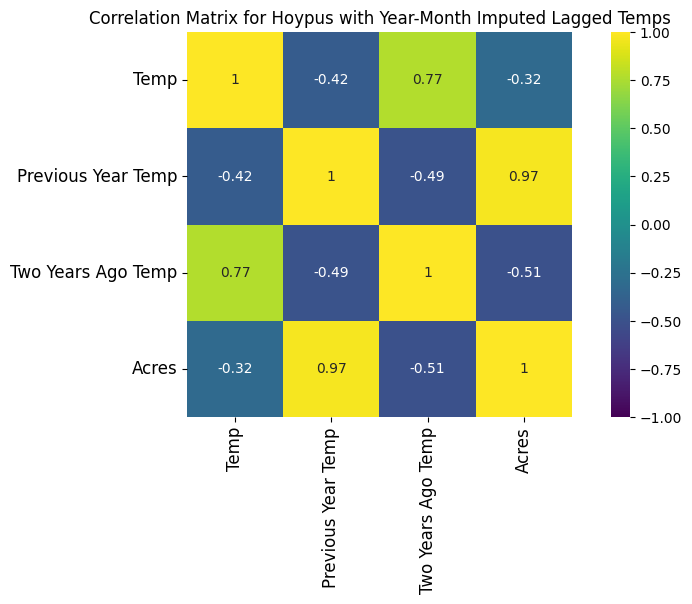

In [14]:
hoypus_imputation_df = merged_df[(merged_df['Bed Name'] == 'Hoypus Point') & (merged_df['NWSC Max Ext'] == 1)].copy()

# Ensure 'Survey Date' is in datetime format
hoypus_imputation_df['Survey Date'] = pd.to_datetime(hoypus_imputation_df['Survey Date'])

# Sort by Site Code and Survey Date to ensure correct lagging
hoypus_imputation_df = hoypus_imputation_df.sort_values(by=['Site Code', 'Survey Date'])

# Drop duplicate rows based on 'Bed Name', 'Site Code', and 'Survey Date'
hoypus_imputation_df = hoypus_imputation_df.drop_duplicates(subset=['Bed Name', 'Site Code', 'Survey Date'], keep='first').copy()

# Calculate Previous Year Temp by grouping and shifting
hoypus_imputation_df['Previous Year Temp'] = hoypus_imputation_df.groupby(['Site Code'])['Temp'].shift(1)

# Calculate Two Years Ago Temp by grouping and shifting
hoypus_imputation_df['Two Years Ago Temp'] = hoypus_imputation_df.groupby(['Site Code'])['Temp'].shift(2)

# Calculate the average 'Temp' for each unique combination of 'Survey Year' and 'Survey Month'
year_month_avg_temps_hoypus = hoypus_imputation_df.groupby(['Survey Year', 'Survey Month'])['Temp'].mean()

for index, row in hoypus_imputation_df.iterrows():
    current_year = row['Survey Year']
    current_month = row['Survey Month']

    # Impute 'Previous Year Temp'
    if pd.isna(row['Previous Year Temp']):
        prev_year = current_year - 1
        prev_year_month_avg = year_month_avg_temps_hoypus.get((prev_year, current_month))
        if pd.isna(prev_year_month_avg):
            hoypus_imputation_df.loc[index, 'Previous Year Temp'] = row['Temp']
        else:
            hoypus_imputation_df.loc[index, 'Previous Year Temp'] = prev_year_month_avg

    # Impute 'Two Years Ago Temp'
    if pd.isna(row['Two Years Ago Temp']):
        two_years_ago = current_year - 2
        two_years_ago_month_avg = year_month_avg_temps_hoypus.get((two_years_ago, current_month))
        if pd.isna(two_years_ago_month_avg):
            hoypus_imputation_df.loc[index, 'Two Years Ago Temp'] = row['Temp']
        else:
            hoypus_imputation_df.loc[index, 'Two Years Ago Temp'] = two_years_ago_month_avg

predictor_variables_imputed_hoypus = ['Temp', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors_imputed_hoypus = hoypus_imputation_df[predictor_variables_imputed_hoypus].select_dtypes(include='number').columns.to_list()

# Ensure 'Acres' is also included for correlation
if 'Acres' not in numerical_predictors_imputed_hoypus:
    numerical_predictors_imputed_hoypus.append('Acres')

corr_matrix_imputed_hoypus = hoypus_imputation_df[numerical_predictors_imputed_hoypus].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix_imputed_hoypus, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)
plt.tick_params(labelsize=12)
plt.title('Correlation Matrix for Hoypus with Year-Month Imputed Lagged Temps')
plt.show()

In [36]:
print(f"Number of rows assessed for July data: {len(july_data_nwsc)}")
print(f"Number of rows assessed for August data: {len(august_data_nwsc)}")
print(f"Number of rows assessed for September data: {len(september_data_nwsc)}")
print(f"Number of rows assessed for Coffin Rocks data: {len(coff_rocks_imputation_df)}")
print(f"Number of rows assessed for Lowell data: {len(lowell_imputation_df)}")
print(f"Number of rows assessed for Hoypus Point data: {len(hoypus_imputation_df)}")
print(f"Number of rows assessed for All Beds data: {len(merged_df_nwsc)}")

Number of rows assessed for July data: 49
Number of rows assessed for August data: 100
Number of rows assessed for September data: 32
Number of rows assessed for Coffin Rocks data: 9
Number of rows assessed for Lowell data: 6
Number of rows assessed for Hoypus Point data: 6
Number of rows assessed for All Beds data: 181
